In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"E:\machine learning excercise\pista\جلسه 3\Advertising.csv")

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0.5, 1.0, 'newspaper spend')

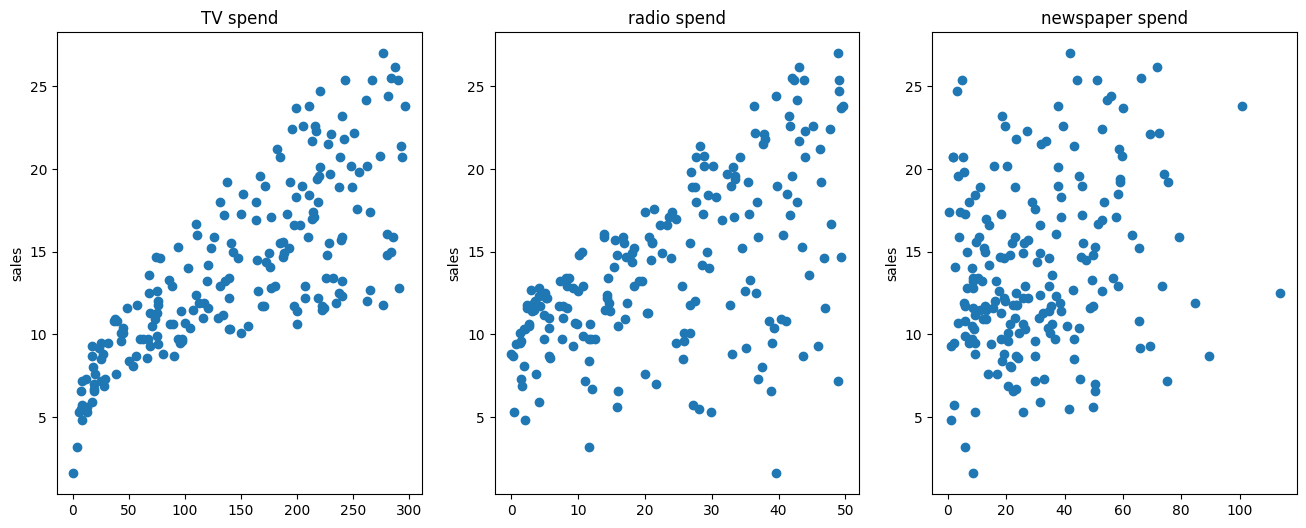

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("sales")
axes[0].set_title("TV spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel("sales")
axes[1].set_title("radio spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel("sales")
axes[2].set_title("newspaper spend")

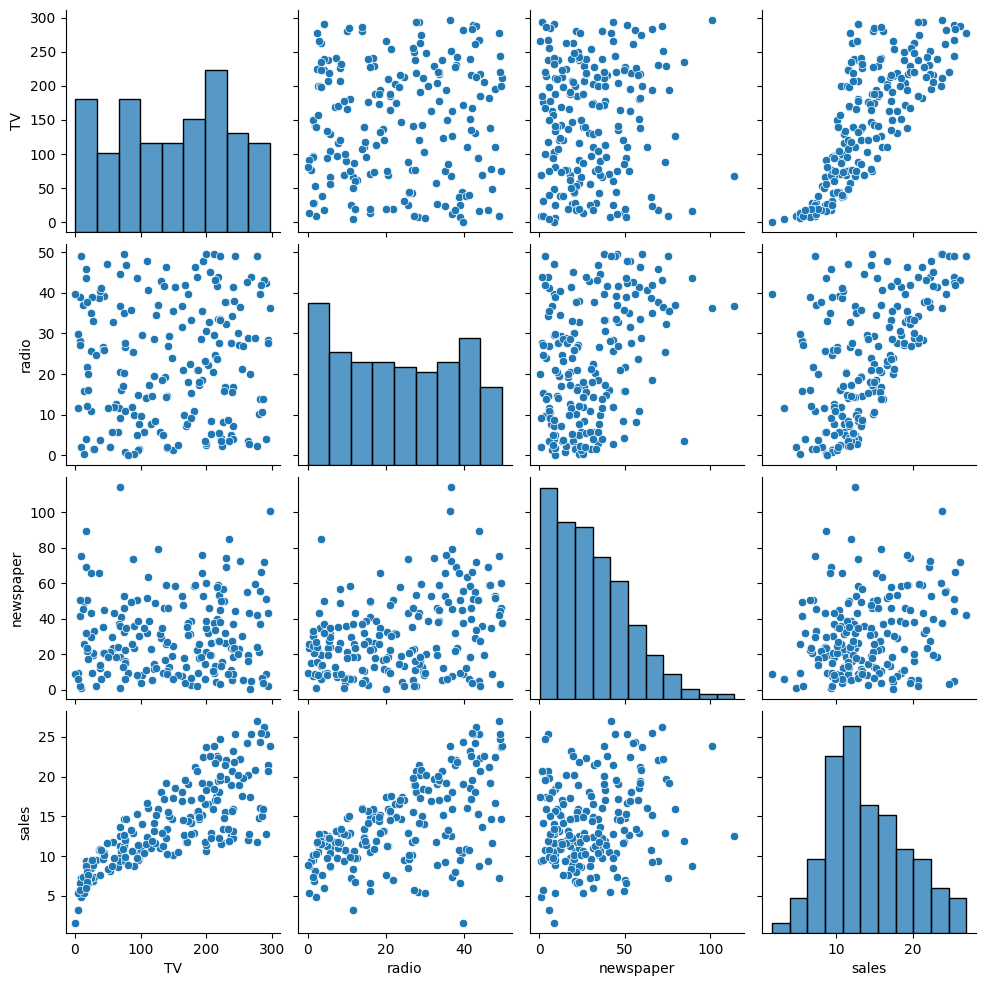

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop('sales',axis=1)
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3,random_state=42)

In [10]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
len(X_train)

140

In [12]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

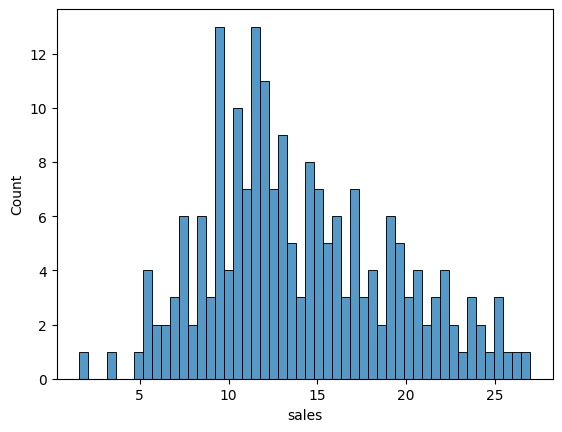

In [19]:
sns.histplot(data=df,x='sales',bins=50)

In [20]:
mean_absolute_error(y_test,y_pred)

1.5116692224549086

In [21]:
mean_squared_error(y_test,y_pred)

3.79679723671522

In [22]:
residual = y_test - y_pred

<Axes: xlabel='sales', ylabel='sales'>

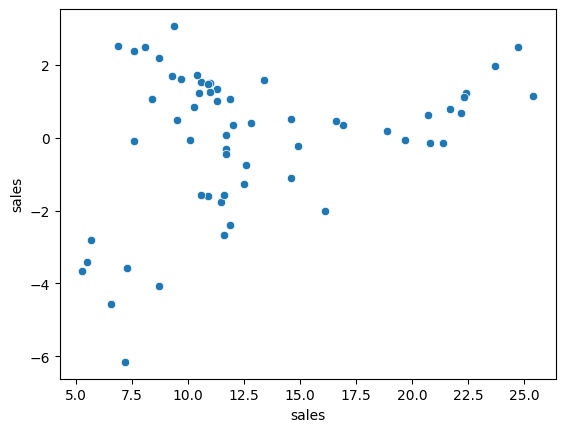

In [23]:
sns.scatterplot(x=y_test,y=residual)

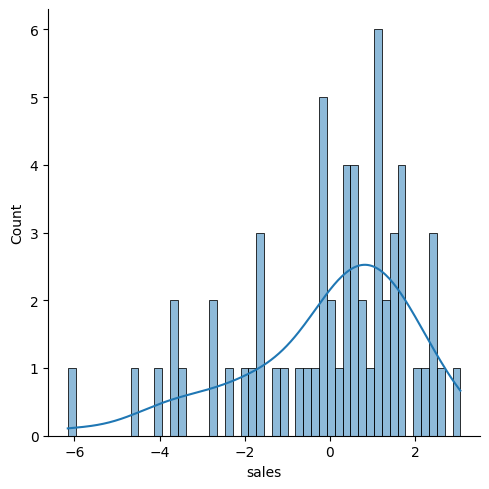

In [24]:
sns.displot(residual,bins=50,kde=True)

In [25]:
final_model = LinearRegression()

In [26]:
final_model.fit(X,y)

LinearRegression()

In [27]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [28]:
final_model.coef_[0]

np.float64(0.0457646454553976)

In [29]:
from joblib import dump

In [30]:
dump(final_model,'final_sales_mode.joblib')

['final_sales_mode.joblib']

In [31]:
from joblib import load

In [32]:
loaded_model = load('final_sales_mode.joblib')

In [33]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
camp = [[149,22,12]]

In [35]:
loaded_model.predict(camp)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [38]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [39]:
poly_features = poly_converter.transform(X)

In [40]:
X.shape

(200, 3)

In [41]:
poly_features.shape

(200, 9)

In [42]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [43]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [44]:
X1_train, X1test, y1_train, y1_test = train_test_split(poly_features, y, test_size=0.33,random_state=42)

In [45]:
model1 = LinearRegression()

In [46]:
model1.fit(X1_train,y1_train)

LinearRegression()

In [47]:
y1_pred = model1.predict(X1test)

In [48]:
MAE1 = mean_absolute_error(y1_test,y1_pred)

In [49]:
MSE1 = mean_squared_error(y1_test,y1_pred)

In [50]:
MAE1

0.547583791914958

In [51]:
MSE1

0.46030624938881926

In [52]:
model1.coef_

array([ 5.49298090e-02,  1.42197827e-02,  1.16916818e-02, -1.12988475e-04,
        1.08937883e-03, -1.01342723e-04,  2.76385341e-04,  1.44165732e-04,
        8.99438936e-05])

In [53]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):

    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.33,random_state=42)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [54]:
train_rmse_errors

[np.float64(1.5526939990087725),
 np.float64(0.6057702019226607),
 np.float64(0.47568472931843425),
 np.float64(0.3742987908933728),
 np.float64(0.2410875758846043),
 np.float64(0.22044269445105044),
 np.float64(0.21968485979997485),
 np.float64(0.28088750370230064),
 np.float64(0.5634444977767419)]

In [55]:
test_rmse_errors

[np.float64(1.9307843822347202),
 np.float64(0.6784587307926837),
 np.float64(0.5148267621784919),
 np.float64(1.2750589649905892),
 np.float64(6.410707444223412),
 np.float64(20.222228204281205),
 np.float64(104.67499248013203),
 np.float64(4697.545590396507),
 np.float64(6348.7921797352665)]

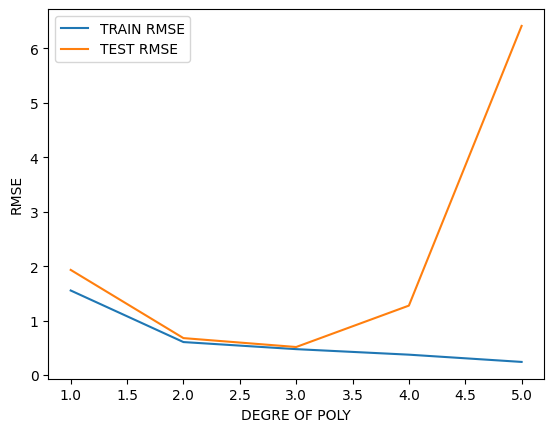

In [56]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('DEGRE OF POLY')
plt.legend()


In [57]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [58]:
poly_features = poly_converter.fit_transform(X)

In [59]:
X.shape

(200, 3)

In [60]:
poly_features.shape

(200, 9)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.33,random_state=42)

Ridge regression

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scalar = StandardScaler()

In [64]:
scalar.fit(X_train)

StandardScaler()

In [65]:
X_train = scalar.transform(X_train)

In [66]:
X_test = scalar.transform(X_test)

In [67]:
X_train

array([[ 1.66759336,  0.26512404, -1.39553662, ..., -0.02131602,
        -0.8758223 , -0.83990056],
       [-1.6774733 , -0.7955751 , -0.34850432, ..., -0.87573884,
        -0.61276827, -0.50326417],
       [-0.2708174 , -1.28512855, -1.03198374, ..., -1.04417936,
        -0.88065984, -0.78841434],
       ...,
       [ 0.74401912,  0.65948655,  1.37716002, ...,  0.4671615 ,
         1.29671891,  1.31093086],
       [ 0.1100505 , -0.93836152, -0.62965189, ..., -0.93960587,
        -0.73358278, -0.65033232],
       [ 1.50453809, -0.93156217, -0.44545176, ..., -0.93683981,
        -0.68831963, -0.55867757]])

In [68]:
from sklearn.linear_model import Ridge

In [69]:
ridge_model = Ridge(alpha=10)

In [70]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [71]:
test_pred = ridge_model.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

In [73]:
MAE

0.7530616629766076

In [74]:
RMSE

np.float64(1.0452091059491218)

In [75]:
from sklearn.linear_model import RidgeCV

In [76]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0))

In [77]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV()

In [78]:
ridge_cv_model.alpha_

np.float64(0.1)

In [79]:
from sklearn.metrics import get_scorer_names

In [80]:
scorer_list = get_scorer_names()


In [81]:
scorer_list

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [82]:
test_pred2 = ridge_cv_model.predict(X_test)

In [83]:
MAE = mean_absolute_error(y_test,test_pred2)
MSE = mean_squared_error(y_test,test_pred2)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred2))

In [84]:
MAE

0.5422401519080644

In [85]:
MSE

0.4513166563425017

In [86]:
ridge_cv_model.coef_

array([ 4.42838425,  0.22680987,  0.23941072, -2.73376765,  3.64070219,
       -0.4743945 ,  0.19150131,  0.13338453,  0.12886391])

#lasso regression

In [87]:
from sklearn.linear_model import Lasso

In [89]:
lasso_model = Lasso(alpha=0.1)

In [90]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [91]:
test_pred_lasso = lasso_model.predict(X_test)

In [92]:
MAE = mean_absolute_error(y_test,test_pred_lasso)
MSE = mean_squared_error(y_test,test_pred_lasso)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred_lasso))

In [93]:
MAE

0.6769038327060557

In [94]:
MSE

0.8235906505744252

In [95]:
RMSE

np.float64(0.9075189532866105)

In [96]:
from sklearn.linear_model import LassoCV

In [97]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5)

In [98]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5)

In [99]:
lasso_cv_model.alpha_

np.float64(0.004968802520343365)

In [100]:
test_pred_lasso_cv = lasso_cv_model.predict(X_test)

In [101]:
MAE = mean_absolute_error(y_test,test_pred_lasso_cv)
MSE = mean_squared_error(y_test,test_pred_lasso_cv)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred_lasso_cv))

In [102]:
MAE

0.525950847298385

In [103]:
RMSE

np.float64(0.6473230819398563)

In [104]:
lasso_cv_model.coef_

array([ 4.3309372 ,  0.25092172,  0.20773543, -2.66400123,  3.62767721,
       -0.40236964,  0.16528508,  0.15107745,  0.08933983])

In [ ]:
lasso_cv_model1 = LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=)

#ELASTICNET

In [106]:
from sklearn.linear_model import ElasticNetCV

In [107]:
ic_model = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],eps=0.001,n_alphas=100,max_iter=100000)

In [108]:
ic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000)

In [109]:
ic_model.l1_ratio_

np.float64(1.0)

np.float64(1.0) means lasso is better

In [110]:
ic_model.alpha_

np.float64(0.004968802520343365)

In [111]:
test_ic = ic_model.predict(X_test)

In [112]:
MAE = mean_absolute_error(y_test,test_ic)
MSE = mean_squared_error(y_test,test_ic)
RMSE = np.sqrt(mean_squared_error(y_test,test_ic))

In [113]:
MAE

0.525950847298385

In [114]:
MSE

0.419027172412114

In [115]:
RMSE

np.float64(0.6473230819398563)